In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load Data
df = pd.read_csv("medical appointment.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:

print(df.shape)
print(df.info())

(110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [16]:

df.rename(columns={'No-show': 'No_show'}, inplace=True)
df['No_show'] = df['No_show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
# Create a Waiting Days Column
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [18]:
# Calculate Overall No-Show Rate
no_show_rate = df['No_show'].mean() * 100
print(f"Overall No-Show Rate: {no_show_rate:.2f}%")

Overall No-Show Rate: 20.19%


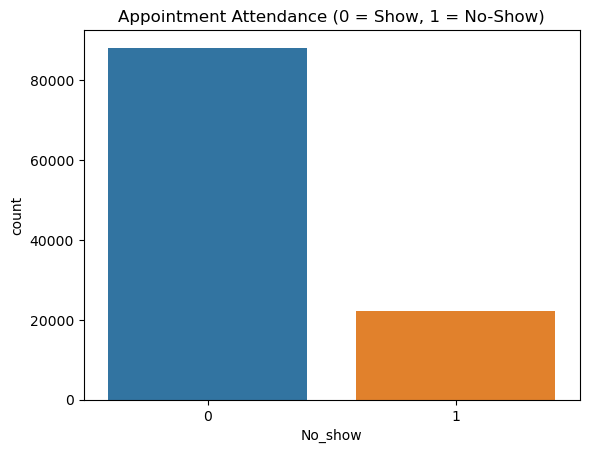

In [19]:
#Plot: No-Show Distribution
sns.countplot(x='No_show', data=df)
plt.title('Appointment Attendance (0 = Show, 1 = No-Show)')
plt.show()

c:\Users\Ian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


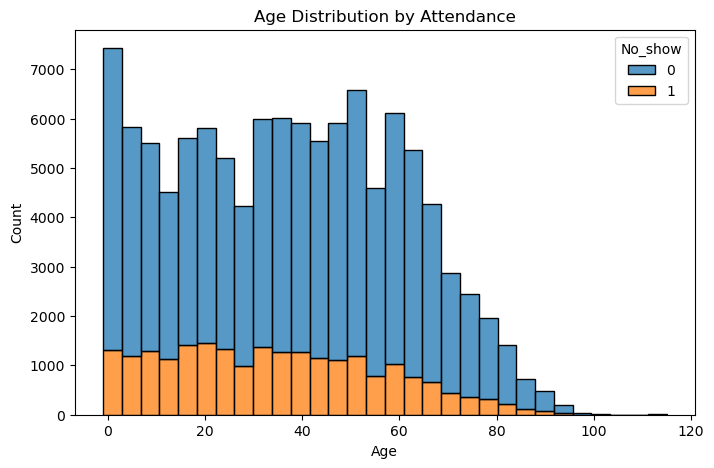

In [20]:
#Plot: Age vs No-Show
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='No_show', multiple='stack', bins=30)
plt.title('Age Distribution by Attendance')
plt.show()

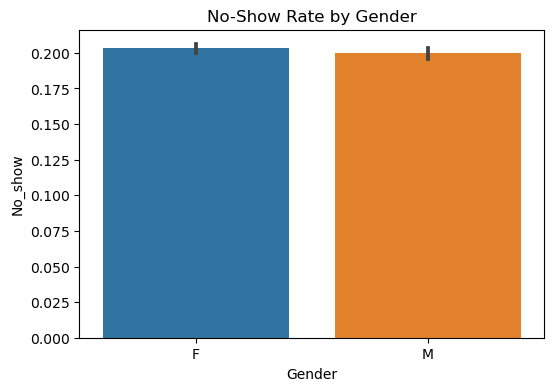

In [21]:
# Plot: Gender vs No-Show
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='No_show', data=df)
plt.title('No-Show Rate by Gender')
plt.show()

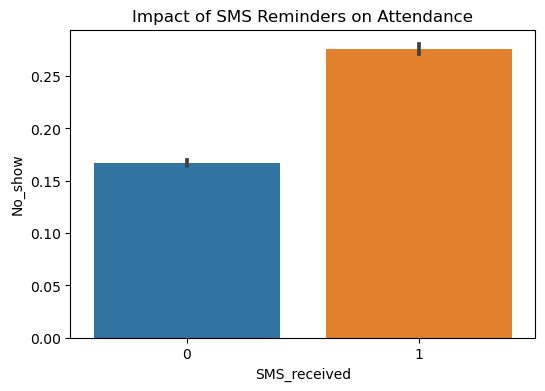

In [22]:
#Effect of SMS Reminders
plt.figure(figsize=(6,4))
sns.barplot(x='SMS_received', y='No_show', data=df)
plt.title('Impact of SMS Reminders on Attendance')
plt.show()

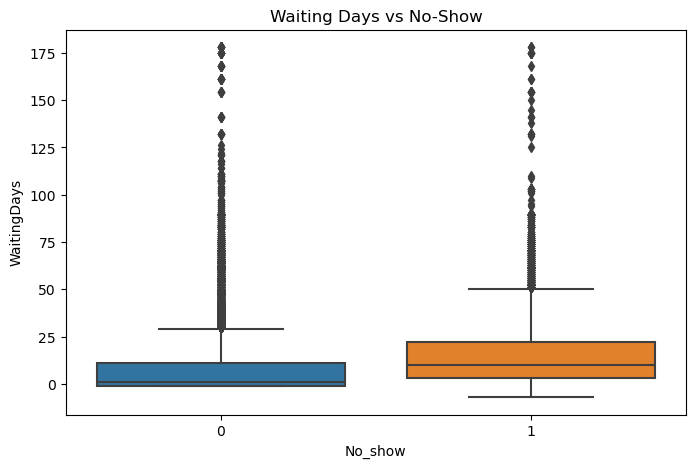

In [23]:
# Waiting Days vs No-Show
plt.figure(figsize=(8,5))
sns.boxplot(x='No_show', y='WaitingDays', data=df)
plt.title('Waiting Days vs No-Show')
plt.show()

In [24]:
# Summary Insights
print("Average Waiting Days (No-Show):", df[df['No_show']==1]['WaitingDays'].mean())
print("Average Waiting Days (Show):", df[df['No_show']==0]['WaitingDays'].mean())

Average Waiting Days (No-Show): 14.83148886598862
Average Waiting Days (Show): 7.754659441320515
